<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Regression model on Forest Fires Data Set
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2022</b> <br>
    Arianna Febbo <br>
    Daniele Pittari <br>
    <a href="mailto:arianna.febbo@mail.polimi.it">arianna.febbo@mail.polimi.it</a><br>
    <a href="mailto:daniele.pittari@mail.polimi.it">daniele.pittari@mail.polimi.it</a><br>
    </div>
    </td>

</tr>
</table>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  
SEED=40

%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype
import scipy

np.random.seed(0)

In [2]:
df = pd.read_csv('forestfires.csv')
df.head(10)
df.shape

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488,Missing,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0.0,0.0
8,8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4,0.0,0.0


(517, 13)

# 1. Exploratory Data Analysis (EDA)

## 1.1 Variable type inspection and data cleaning

<ins>**Variable type inspection**</ins>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null object
DMC      517 non-null float64
DC       517 non-null object
ISI      517 non-null object
temp     517 non-null object
RH       517 non-null int64
wind     517 non-null object
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 52.6+ KB


Columns such as 'FFMC', 'DC', 'ISI', 'temp', 'wind' should not be of type 'object'. It's due to the fact that there are missing values in them. We will convert them in type 'float64'.

<ins>**Checking for missing values**</ins>

In [4]:
print('n° of missing values column X is', sum(df['X'] == 'Missing'))
print('n° of missing values column Y is',sum(df['Y'] == 'Missing'))
print('n° of missing values column month is',sum(df['month'] == 'Missing'))
print('n° of missing values column day is',sum(df['day'] == 'Missing'))
print('n° of missing values column FFMC is',sum(df['FFMC'] == 'Missing'))
print('n° of missing values column DMC is',sum(df['DMC'] == 'Missing'))
print('n° of missing values column DC is',sum(df['DC'] == 'Missing'))
print('n° of missing values column ISI is',sum(df['ISI'] == 'Missing'))
print('n° of missing values column temp is',sum(df['temp'] == 'Missing'))
print('n° of missing values column RH is',sum(df['RH'] == 'Missing'))
print('n° of missing values column wind is',sum(df['wind'] == 'Missing'))
print('n° of missing values column rain is',sum(df['rain'] == 'Missing'))
print('The total n° of missing values is 7')

n° of missing values column X is 0
n° of missing values column Y is 0
n° of missing values column month is 0
n° of missing values column day is 0
n° of missing values column FFMC is 1
n° of missing values column DMC is 0
n° of missing values column DC is 1
n° of missing values column ISI is 2
n° of missing values column temp is 2
n° of missing values column RH is 0
n° of missing values column wind is 1
n° of missing values column rain is 0
The total n° of missing values is 7


C:\Users\danie\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<ins>**Filtering for missing values**</ins>

In [5]:
#drop rows with missing values
indexNames = df[(df['FFMC'] == 'Missing') | (df['DC'] == 'Missing') | (df['ISI'] == 'Missing') | (df['temp'] == 'Missing') | (df['wind'] == 'Missing')].index
df.drop(indexNames, inplace=True)                  
df.shape

(510, 13)

**Observation:**  The number of filtered observations because of NA consist of ~1,35% total obs. of the original dataset. Therefore, we considered that missing values filtering would be unlikely to bias our analysis and we did not considered methods for furter investigation of NA values.  

<ins>**Converting to float type columns which shouldn't be of type object**</ins>

In [6]:
#converting to float type columns which shouldn't be of type object.
df = df.astype({'FFMC':'float', 'DC':'float', 'ISI':'float', 'temp':'float','wind':'float' })
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 516
Data columns (total 13 columns):
X        510 non-null int64
Y        510 non-null int64
month    510 non-null object
day      510 non-null object
FFMC     510 non-null float64
DMC      510 non-null float64
DC       510 non-null float64
ISI      510 non-null float64
temp     510 non-null float64
RH       510 non-null int64
wind     510 non-null float64
rain     510 non-null float64
area     510 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 55.8+ KB


## 1.2 Univariate analysis
Visualize data distribution using histogram for numeric variables and bar chart for categorical variables.

Univariate analysis is useful to:
- identify if dataset contains outliers
- identify if data transformation is needed

### 1.2.1 Dependent variable: Area

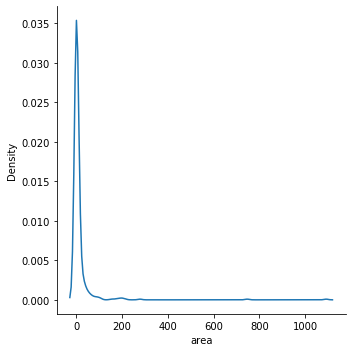

In [7]:
sns.displot(df, x="area", kind="kde", bw_adjust=.5);

Density plot based on KDE shows that the distribution of the variable 'Area' is skewed towards 0.0 .
Therefore, we decided to apply a log10(x+1) transformation to this variable. 

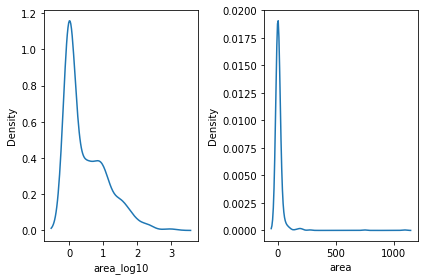

In [8]:
#log-transform 'area' column
df_area_log10=df
df_area_log10['area_log10']= np.log10(df['area']+1)

# Vis. estimated PDF using KDE
fig, ax =plt.subplots(1,2)
sns.kdeplot(df_area_log10['area_log10'], ax=ax[0])
sns.kdeplot(df_area_log10['area'], ax=ax[1])
plt.tight_layout();


### 1.2.2 Independent variables: numerical

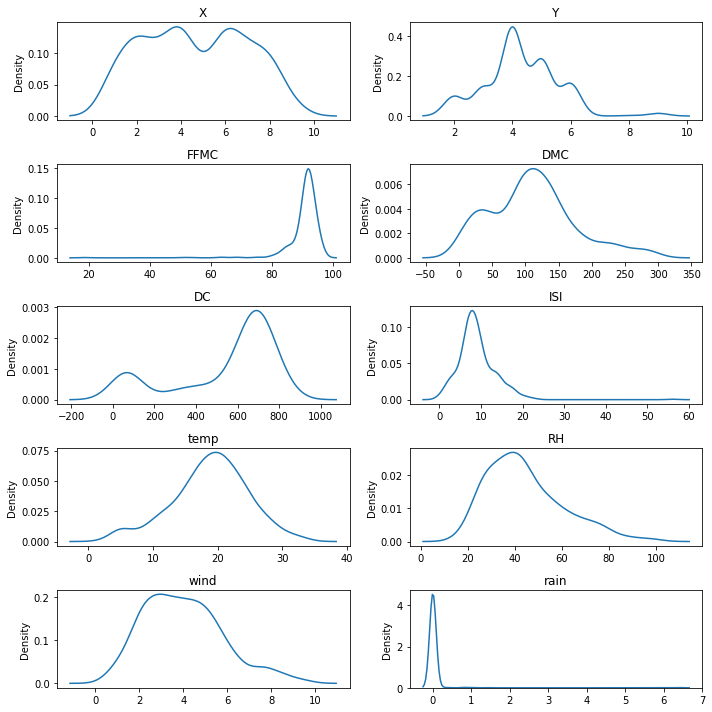

In [9]:
# Filtering data for the column of interest
numeric_columns= ["X", "Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
df_numerical=df[numeric_columns].copy(deep=True)


# Assign df to plot 
dftp=df_numerical

# Define number of rows and columns in the subplot
nr=5
nc=2

colnames=dftp.columns
axrow=-1

# Plotting
fig, ax =plt.subplots(nr,nc, sharex=False, figsize=(10,10))

for column_index in range(0,len(colnames)-1,nc):

    axrow=axrow+1
    
    sns.kdeplot(dftp[colnames[column_index]], ax=ax[axrow,0]);
    sns.kdeplot(dftp[colnames[column_index+1]], ax=ax[axrow,1]);
    ax[axrow,0].set(xlabel=None);
    ax[axrow,1].set(xlabel=None);
    ax[axrow,0].set_title(colnames[column_index]);
    ax[axrow,1].set_title(colnames[column_index+1]);
 
plt.plot();
plt.tight_layout();


**Observations**: 
- FFMC and Rain show skewed distributions thoward a value in their range and FFMC shows a left tail.
- X, DC and DMC seem to have a more pronunced bimodal pattern

FFMC could be manipulated using transformations. In the bivariate analysis, we further visualized the relationship between FFMC with log10 area and we applied the transformation and visualized the increase of the linear fit in that chapter. On the other hand, Rain seem to be heavily skewed toward zero. 

Here we further analyzed the distribution of the rain values:

<ins>**Plotting rain distribution with and witouth log10 transformation**</ins>

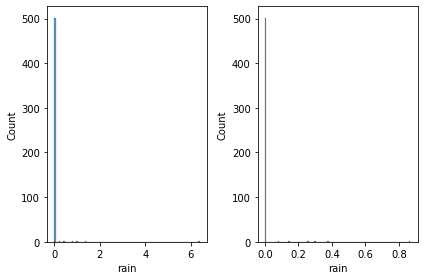

In [10]:
fig, ax =plt.subplots(1,2)
sns.histplot(df_area_log10['rain'],bins=100, ax=ax[0]);
sns.histplot(np.log10(df_area_log10['rain']+1), bins=100, ax=ax[1]);
plt.tight_layout();

The plot shows clearely that the the skewness is caused by the fact that the majority of the observations are 0 values.

<ins>**Computation of the non zero values:**</ins>

In [11]:
rain_0 = sum(df_area_log10['rain'] == 0)
rain_diff_0 = sum(df_area_log10['rain'] != 0)
print('Percentage of non-zero observations for rain: ', rain_diff_0/rain_0*100)

Percentage of non-zero observations for rain:  1.593625498007968


**Observation**: rain is likely not to be an informative numerical variable due to ~94% obs. being zero values. 

### 1.2.3 Independent variables: categorical

<ins>**Barchart for categorical variable 'month'**</ins>

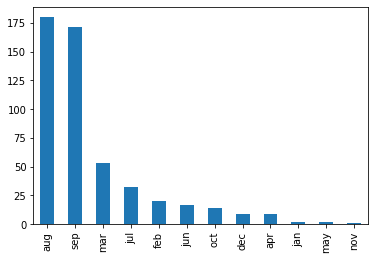

In [12]:
df_area_log10['month'].value_counts().plot(kind='bar');

<ins>**Barchart for categorical variable 'Day'**</ins>

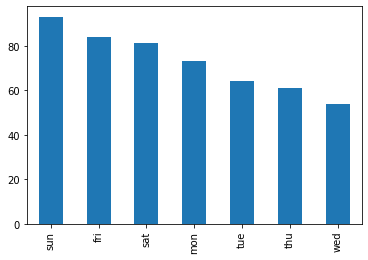

In [13]:
df_area_log10['day'].value_counts().plot(kind='bar');

**Observations**: data recording seem to have a biased sampling for August, September and March months. This is reasonable since it is logical to expect seasonality in the studied phenomena. For the same reason, the usefullness of the model may be expected during these months. On the other hand, this could impact the predictive capacity of the model for unrapresentative months. 

The same heterogenety is not observed for the variable day. And therefore it will not be used in the regression analysis.
For these reasons we did not considered recoding the variables into bigger groups (e.g. seasons).

### 1.2.3.2 Considering geographic coordinates as categorical: univariate analysis
Geographic coordinates may also be considered categorical variables. This is because localization may have an impact that is confined to specific subregions, which may be not well described by a numerical trend.

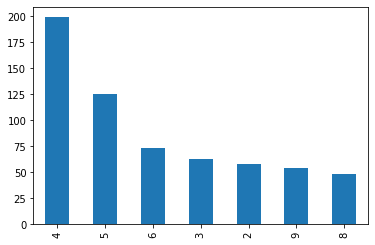

In [14]:
cat_xy=df_area_log10.copy(deep=True)
cat_xy['X'].apply(str)
cat_xy['Y'].apply(str)

cat_xy['X'].value_counts().plot(kind='bar');
cat_xy['Y'].value_counts().plot(kind='bar');

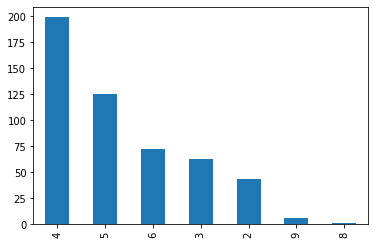

In [15]:
cat_xy['Y'].value_counts().plot(kind='bar');

**Observations**: data at coordinates Y 9 and 8 shows underapresentation. 

### 1.3 Bivariate analysis

### 1.3.1.1 Numerical variables / area log 10 relationship visualization
Using scatterplot to plot the target variable against the predicting variables.

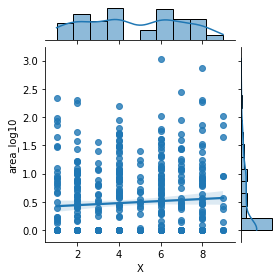

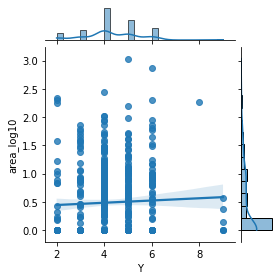

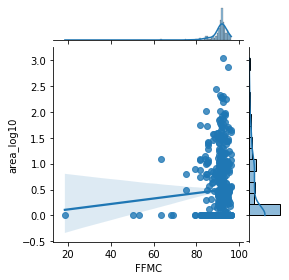

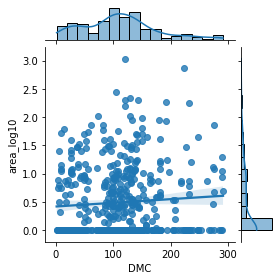

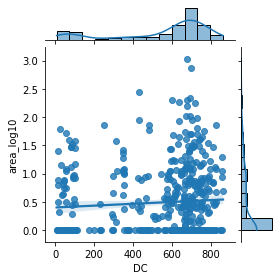

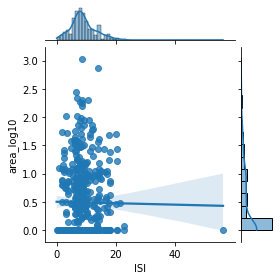

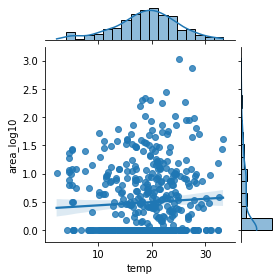

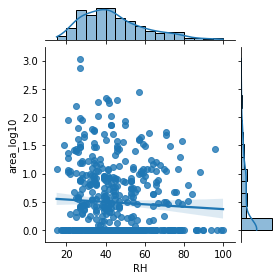

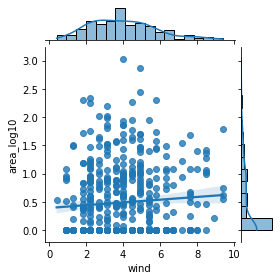

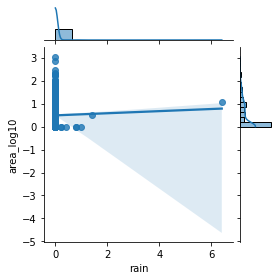

In [16]:
df_area_log10_nf=df_numerical.copy(deep=True)
df_area_log10_nf["area_log10"]=np.log10(df['area']+1)


# Define number of rows and columns in the subplot
nr=4
nc=2

colnames=df_area_log10_nf.columns
colnames=colnames[colnames != "area_log10"]

for column_index in range(0,len(colnames)-1,nc):
    axrow=axrow+1;
    sns.jointplot(y="area_log10", x=colnames[column_index], data=df_area_log10_nf, kind='reg',height=4);
    sns.jointplot(y="area_log10", x=colnames[column_index+1], data=df_area_log10_nf, kind='reg',height =4);

**Observation**: no strong linear trends between the numerical variables and log 10 area are detected overall. This observation is confermed by pairwise computation of correlation coefficients at 1.3.1.2. 

### Numerical variables: FFMC transformations

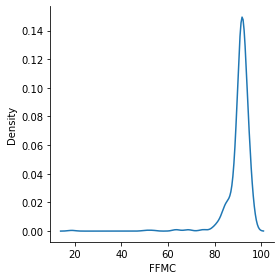

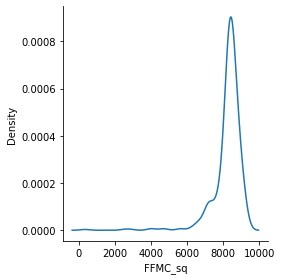

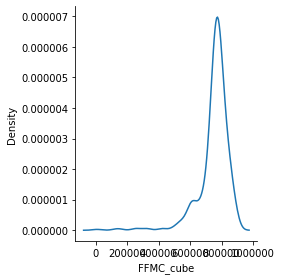

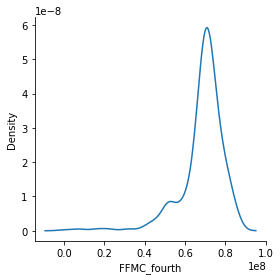

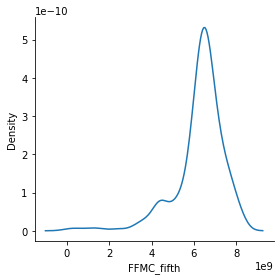

In [17]:
#FFMC feature is skewed to thoward values near 90, in order to trasform its distribution 
#we powered it to a range of values from 2 to 5
df_area_log10_nf_FFMCtrasf=df_area_log10_nf;
df_area_log10_nf_FFMCtrasf['FFMC_sq']= np.power((df_area_log10['FFMC']),2);
df_area_log10_nf_FFMCtrasf['FFMC_cube']= np.power((df_area_log10['FFMC']),3);
df_area_log10_nf_FFMCtrasf['FFMC_fourth']= np.power((df_area_log10['FFMC']),4);
df_area_log10_nf_FFMCtrasf['FFMC_fifth']= np.power((df_area_log10['FFMC']),5);

# Visualisation of the estimated PDF using KDE
sns.displot(df_area_log10_nf_FFMCtrasf['FFMC'], kind="kde", height=4);
sns.displot(df_area_log10_nf_FFMCtrasf['FFMC_sq'], kind="kde",height=4);
sns.displot(df_area_log10_nf_FFMCtrasf['FFMC_cube'], kind="kde",height=4);
sns.displot(df_area_log10_nf_FFMCtrasf['FFMC_fourth'], kind="kde",height=4);
sns.displot(df_area_log10_nf_FFMCtrasf['FFMC_fifth'], kind="kde",height=4);

**Observation**: as expected the distribution "spreads" more toward zero as the value of power increases.

<ins>**Visualizing if the transformation increases the linear fit between transformed FFMC and log10 area**</ins>

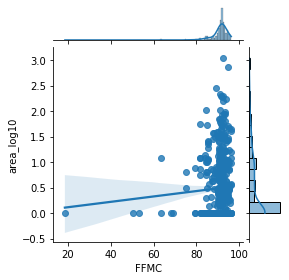

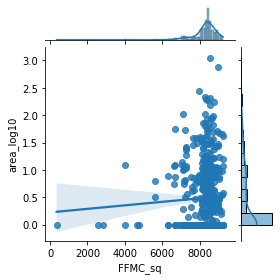

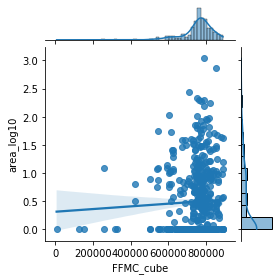

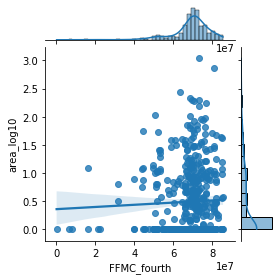

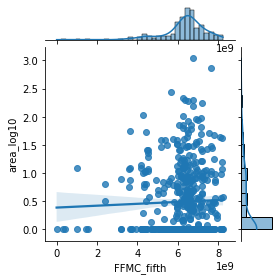

In [18]:
sns.jointplot(y="area_log10", x='FFMC', data=df_area_log10_nf_FFMCtrasf, kind='reg',height =4);
sns.jointplot(y="area_log10", x='FFMC_sq', data=df_area_log10_nf_FFMCtrasf, kind='reg',height =4);
sns.jointplot(y="area_log10", x='FFMC_cube', data=df_area_log10_nf_FFMCtrasf, kind='reg',height =4);
sns.jointplot(y="area_log10", x='FFMC_fourth', data=df_area_log10_nf_FFMCtrasf, kind='reg',height =4);
sns.jointplot(y="area_log10", x='FFMC_fifth', data=df_area_log10_nf_FFMCtrasf, kind='reg',height =4);

**Observation**: the "spreading" of the distribution caused by the trasformation seem to decrease the steepness of the regression line as the value of power increases. This can also be observed in the heatmap at 1.3.1.2 showing pairwise correlation beteen numerical variables.  Cube transformation show a good trade off between the expansion of the distribution of low FFMC values and loss of steepness. 

### 1.3.1.2 Correlation analysis

<ins>**Visualizing the pairwise strength of linear correlation between the regressor candidates**</ins>

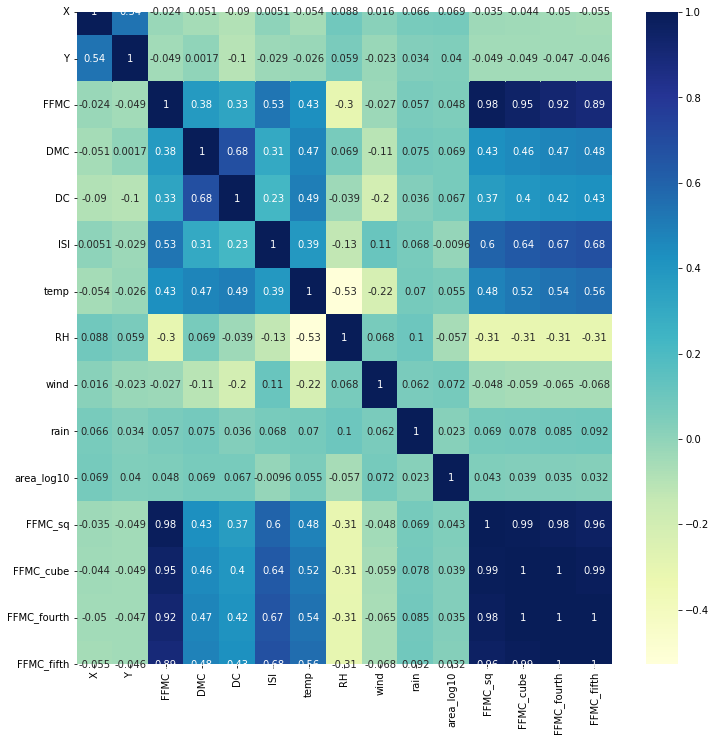

In [19]:
plt.figure( figsize= (12,12));
correlation = df_area_log10_nf_FFMCtrasf.corr();
sns.heatmap(correlation, cmap = "YlGnBu", annot=True);

**Observations:**

*Independent variables showing high correlation with area log10:* all the independent variables show correlation coefficients lower than 0.10. This is an indicator of poor linear fit between the potential regressors and the variable to predict. Previous data visualization in both univariate and bivariate EDA (in 1.2.2 and 1.3.1.1) suggest this low correlation coefficient not being caused by non linear trends.  This suggests that linear regression modelling may be unsuitable. 

*Sources of multicollinearity:*
Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard to interpret the model and also may influence potential overfitting. 
Some of our variables happen to be collinear:
- Positive correlations between FFMC_cube, DC, DMC, ISI & temp
- Positive correlation between X and Y
- Negative between temp and RH


### 1.3.2 Categorical variables

### 1.3.2.1 Categorical variables / area log 10 relationship visualisation

### Month/area log10

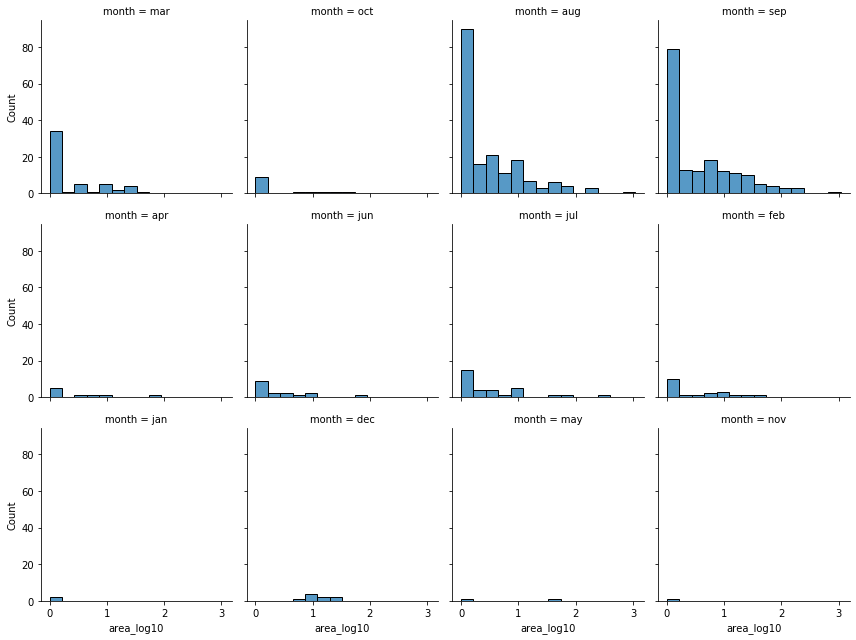

In [20]:
sns.displot(data=df_area_log10,
         x='area_log10',
        col='month',col_wrap=4, height=3);

**Observation:** forest fires happen more often in some of the warmer months, especially august and september. However, we could not make this observation systematical for the summer season since June and July do not show the same pattern. This is due to the low number of observations rather than null area values. 

### Days/area log10

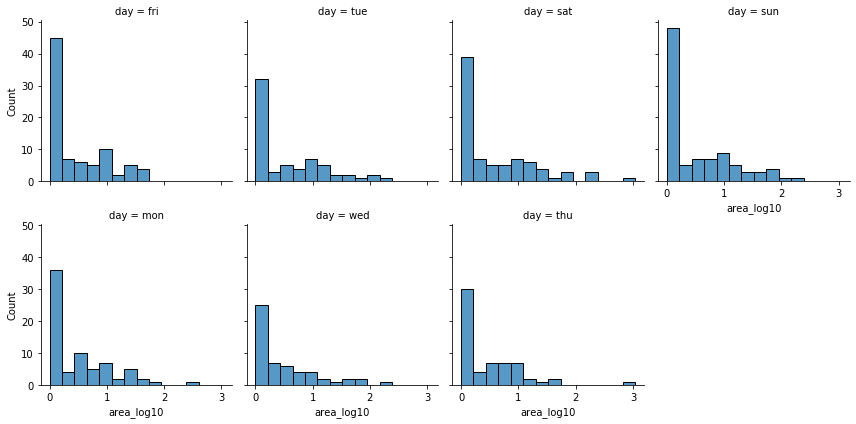

In [21]:
sns.displot(data=df_area_log10,
         x='area_log10',
        col='day',col_wrap=4, height=3);

**Observation:** not very straightforward and unique trends can be identified for the varible day. 

### 1.3.2.2 Geographical coordinates as categorical variables / area log 10 relationship visualisation

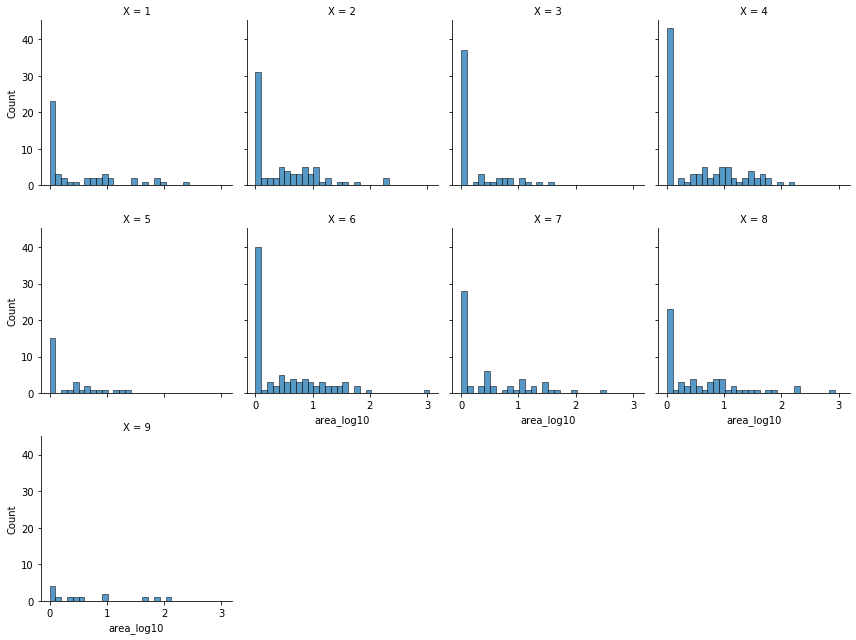

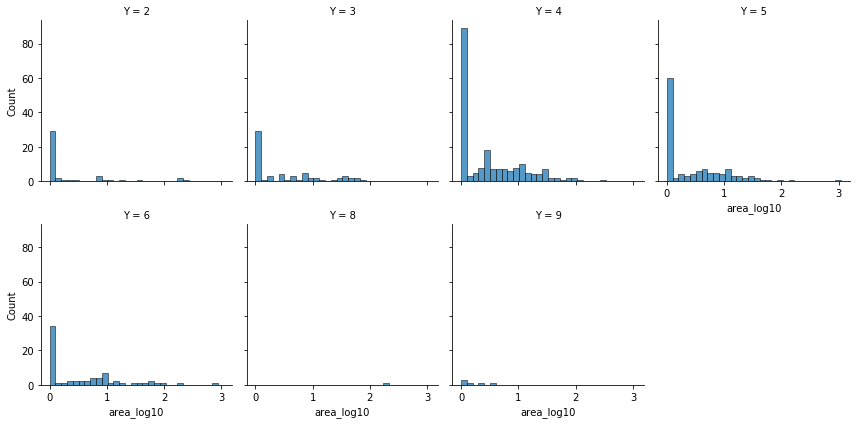

In [22]:
cat_xy=df_area_log10.copy(deep=True)
cat_xy['X'].apply(str)
cat_xy['Y'].apply(str)
#cat_xy["Y"]=chr(cat_xy["Y"])
cat_xy

sns.displot(data=cat_xy,
         x='area_log10',
        col='X',col_wrap=4, height=3, bins=30);

sns.displot(data=cat_xy,
         x='area_log10',
        col='Y',col_wrap=4, height=3, bins=30);

**Observation:** this visualisation aimed at highlighting potential areas in the Matiosinhos associated with higher burned areas. Unfortunatelly, the variation in sampling among the coordinates hampers the capacity to discriminate between actual trends and lower number of observations.
    

## 1.3.3 Testing for multicollinearity

One way to take out independent variables in a dataset with high multicollinearity is to check for the Variance Inflation Factor (VIF) and indentify values higher than 10. 

In [23]:
#variable “month” and "day" are categorical and we should convert them to dummy variables before fitting the regression model
df_area_log10_dummy = pd.get_dummies(df_area_log10, columns=['X','Y','month','day'], drop_first=True)
df_area_log10_dummy['FFMC_cube']= np.power((df_area_log10_dummy['FFMC']),3)
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df_area_log10_dummy[df_area_log10_dummy.columns.difference(['area_log10','FFMC'])].columns
vif["vif_Factor"] = [variance_inflation_factor(df_area_log10_dummy[df_area_log10_dummy.columns.difference(['area_log10','FFMC'])].values, i) for i in range(df_area_log10_dummy[df_area_log10_dummy.columns.difference(['area_log10','FFMC'])].shape[1])]
vif

,features,vif_Factor
0,DC,162.051567
1,DMC,15.355389
2,FFMC_cube,95.518807
3,ISI,9.634431
4,RH,16.209722
5,X_2,2.601859
6,X_3,2.643427
7,X_4,3.574167
8,X_5,1.920636
9,X_6,3.691708


Since there are many variables with high VIF, we normalized data and calculated VIF for each feature again.

In [24]:
df_area_log10_norm = df_area_log10_dummy.copy(deep=True)
df_area_log10_norm = (df_area_log10_norm - df_area_log10_norm.mean()) / df_area_log10_norm.std()
vif2 = pd.DataFrame()
vif2["features"] = df_area_log10_norm[df_area_log10_norm.columns.difference(['area_log10','FFMC'])].columns
vif2["vif_Factor"] = [variance_inflation_factor(df_area_log10_norm[df_area_log10_norm.columns.difference(['area_log10','FFMC'])].values, i) for i in range(df_area_log10_norm[df_area_log10_norm.columns.difference(['area_log10','FFMC'])].shape[1])]
vif2

,features,vif_Factor
0,DC,27.969043
1,DMC,4.068493
2,FFMC_cube,2.778576
3,ISI,2.167548
4,RH,2.960578
5,X_2,2.285796
6,X_3,2.404640
7,X_4,3.013810
8,X_5,1.819879
9,X_6,3.188930


**Observations:** 
- Some of the variables have VIF >10, therefore indicating significant multicollinearity. We could try in the regression model to take out those variables and check if the model metrics improve. 

- The high multicollinearity showed by VIF and the heatmap prevents us from using a complete linear regression model for inference purposes.

# 2 Regression models

## 2.1 Multiple linear regression


**Building four different multiple linear regression models:**

- One where the variables 'X' and 'Y' are treated as numerical, fitting all the variables in our regression model;
- One where the variables 'X' and 'Y' are treated as categorical and converted to dummy variables, fitting all the variables in our regression model;
- One where the variables 'X' and 'Y' are treated as numerical, without fitting 'days' and 'rain' in our regression model;
- One where the variables 'X' and 'Y' are treated as categorical and converted to dummy variables, without fitting 'days' and 'rain' in our regression model. 

*Dummy transformation has been performed to retrieve k-1 dummy variables (k: original modality of the categorical variable).*

*The multiple linear models formula was always described by considering an intercept.*


**Prediction performance estimation metrics:**

- R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. 
- MSE (Mean Square Error), it's calculated as the mean or average of the squared differences between predicted and expected target values in a dataset. Smaller it is, the better. 
- RMSE (Root Mean Square Error), it's calculated as the square root of the error MSE. Smaller it is, the better.



<ins>**Data split**</ins> 

Let's split data into training and test sets.

In [25]:
# Replacing FFMC with FFMC cube (because of its pontential better performance, section 1.3.1.1)
df_area_log10['FFMC_cube']= np.power((df_area_log10['FFMC']),3)
df_area_log10.head(4)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log10,FFMC_cube
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,640503.928
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,743677.416
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,743677.416
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,771095.213


In [26]:
#variable to be predicted
y = df_area_log10['area_log10']
print("y.shape", y.shape)

y.shape (510,)


In [27]:
#predicting variables for global models, where we mantain all features
#predicting variables
X_glob=df_area_log10.copy(deep=True)
X_glob = X_glob.drop(['area_log10','area', 'FFMC'], axis=1)

X_numcoord_glob=X_glob.copy(deep=True)
X_numcoord_glob=pd.get_dummies(X_numcoord_glob, columns=['month','day'], drop_first=True)

X_catcoord_glob=X_glob.copy(deep=True)
X_catcoord_glob=pd.get_dummies(X_catcoord_glob, columns=['X','Y','month','day'], drop_first=True)


X_numcoord_glob.shape
X_catcoord_glob.shape

(510, 27)

(510, 39)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#splitting data in train (80%) and test (20%)
X_train_numcoord_glob,X_test_numcoord_glob,y_train,y_test = train_test_split(X_numcoord_glob, y, test_size=0.2, random_state = SEED)
X_train_catcoord_glob,X_test_catcoord_glob,y_train,y_test = train_test_split(X_catcoord_glob, y, test_size=0.2, random_state = SEED)

# summarize
print('Train_numcoord_glob',X_train_numcoord_glob.shape, y_train.shape)
print('Test_numcoord_glob', X_test_numcoord_glob.shape, y_test.shape)
# summarize
print('Train_catcoord_glob',X_train_catcoord_glob.shape, y_train.shape)
print('Test_catcoord_glob', X_test_catcoord_glob.shape, y_test.shape)

Train_numcoord_glob (408, 27) (408,)
Test_numcoord_glob (102, 27) (102,)
Train_catcoord_glob (408, 39) (408,)
Test_catcoord_glob (102, 39) (102,)


In [29]:
#predicting variables for filtered models, where we take out 'days' and 'rain'
X_filt=df_area_log10.copy(deep=True)
X_filt = X_filt.drop(['area_log10','area', 'FFMC', 'day','rain'], axis=1)

X_numcoord_filt=X_filt.copy(deep=True)
X_numcoord_filt=pd.get_dummies(X_numcoord_filt, columns=['month'], drop_first=True)

X_catcoord_filt=X_filt.copy(deep=True)
X_catcoord_filt=pd.get_dummies(X_catcoord_filt, columns=['X','Y','month'], drop_first=True)


X_numcoord_filt.shape
X_catcoord_filt.shape

(510, 20)

(510, 32)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#splitting data in train (80%) and test (20%)
X_train_numcoord_filt,X_test_numcoord_filt,y_train,y_test = train_test_split(X_numcoord_filt, y, test_size=0.2, random_state = SEED)
X_train_catcoord_filt,X_test_catcoord_filt,y_train,y_test = train_test_split(X_catcoord_filt, y, test_size=0.2, random_state = SEED)

# summarize
print('Train_numcoord_filt',X_train_numcoord_filt.shape, y_train.shape)
print('Test_numcoord_filt', X_test_numcoord_filt.shape, y_test.shape)
# summarize
print('Train_catcoord_filt',X_train_catcoord_filt.shape, y_train.shape)
print('Test_catcoord_filt', X_test_catcoord_filt.shape, y_test.shape)

Train_numcoord_filt (408, 20) (408,)
Test_numcoord_filt (102, 20) (102,)
Train_catcoord_filt (408, 32) (408,)
Test_catcoord_filt (102, 32) (102,)


### 2.1.1 Regression model where 'X' and 'Y' are treated as numerical variables, fitting all the variables in our regression model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Fit the LinearRegression predictor
model_numcoord_glob = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model_numcoord_glob = model_numcoord_glob.fit(X_train_numcoord_glob, y_train)          # 2- model fitting
y_predict_test_numcoord_glob = model_numcoord_glob.predict(X_test_numcoord_glob)       # 3- prediction
y_predict_train_numcoord_glob = model_numcoord_glob.predict(X_train_numcoord_glob)


print("Train R2 score ", r2_score(y_train, y_predict_train_numcoord_glob))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train_numcoord_glob))
print("Train RMSE score: ", np.sqrt(mean_squared_error(y_train, y_predict_train_numcoord_glob)))

print("Test R2 score ", r2_score(y_test, y_predict_test_numcoord_glob))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test_numcoord_glob))
print("Test RMSE score: ", np.sqrt(mean_squared_error(y_test, y_predict_test_numcoord_glob)))

cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=SEED)
mse=cross_val_score(model_numcoord_glob, X_test_numcoord_glob,y_test, scoring = 'neg_mean_squared_error',cv=cv) #5 cross validation
mean_mse=np.mean(mse)
print("mean MSE score ",mean_mse) #more close to 0 the better it is

Train R2 score  0.10972945530742928
Train MSE score  0.33754150469098626
Train RMSE score:  0.5809832223833888
Test R2 score  -0.1493662854156741
Test MSE score  0.38249217479427855
Test RMSE score:  0.6184595175064238
mean MSE score  -0.4615833268618233


In [32]:
#fit linear model
X_train_numcoord_glob_sm = sm.add_constant(X_train_numcoord_glob)
lm_model_numcoord_glob = sm.OLS(y_train, X_train_numcoord_glob_sm.astype(float))
results_numcoord_glob = lm_model_numcoord_glob.fit()
print(results_numcoord_glob.summary())

                            OLS Regression Results                            
Dep. Variable:             area_log10   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.735
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0141
Time:                        10:12:58   Log-Likelihood:                -357.37
No. Observations:                 408   AIC:                             770.7
Df Residuals:                     380   BIC:                             883.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1327      0.501     -0.265      0.7

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<ins>**Showing the overlapping histograms of y_train in blue and y_predic_train in orange**</ins> 

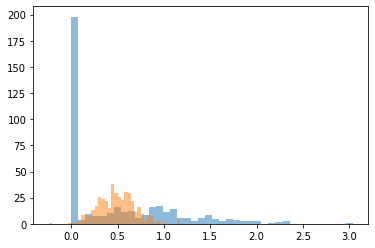

In [33]:
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40)
plt.hist(y_train,**kwargs);
plt.hist(y_predict_train_numcoord_glob,**kwargs);

<ins>**Showing the overlapping histograms of y_test in blue and y_predic_test in orange**</ins>

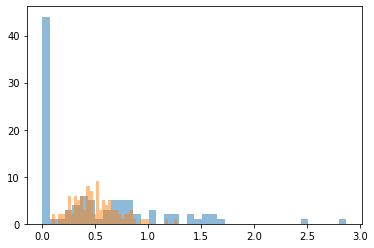

In [34]:
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40);
plt.hist(y_test, **kwargs);
plt.hist(y_predict_test_numcoord_glob, **kwargs);

**Observation**: The model is not able in the test dataset to predict area with log values greater than 1.3.

### Checking for heteroscedasticity

Ordinary least squares (OLS) regression assumes that residuals are drawn from a population that has a constant variance (homoscedasticity). If the model does not meet this assumption, it makes unreliable the meaning of p-values when considering the model for inference purposes (e.g. feature selection). 

In the context of residual analysis, a "residuals versus fits plot" is the most frequently created plot. The plot is used to detect non-linearity, unequal error variances, and outliers. We also performed a quantitative inspection by using the Shapiro Wilk test, which suggests the presence of a normal-like distribution when the p-value of the test is > 0.05.

(0.9269799590110779, 3.2601522935264693e-13)

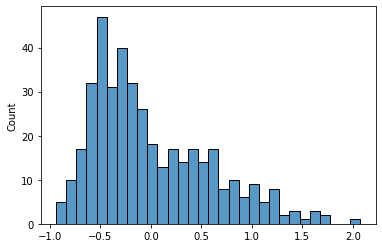

In [35]:
#plotting residuals
scipy.stats.shapiro(results_numcoord_glob.resid)
sns.histplot(results_numcoord_glob.resid, bins=30)

**Observation**: when the assumption of homoscedasticity is met, residuals are normally distributed around a mean of zero, which it is not clearly this case.

Text(0.5, 0, 'y_pred_train/predicted values')

Text(0, 0.5, 'Residuals')

(-2, 2.5)

(0, 1.5)

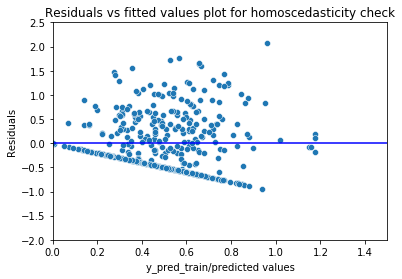

In [36]:
%%capture --no-display
p = sns.scatterplot(y_predict_train_numcoord_glob,results_numcoord_glob.resid);
plt.xlabel('y_pred_train/predicted values');
plt.ylabel('Residuals');
plt.ylim(-2,2.5);
plt.xlim(0,1.5);
p = sns.lineplot([0,26],[0,0],color='blue');
p = plt.title('Residuals vs fitted values plot for homoscedasticity check');

**Observation**: There's no homogeneity of variance, and there are some outliers. The plot clearly shows the cone shape typical of heteroscedasticity. This breaks the OLS regression assumption that states that all residuals come from a population with constant variance.

In conclusion, the global model is not suitable for feature selection based on the level of singificance of the single features. Therefore, this part of the OLS output will be ignored.

### 2.1.2 Regression model where 'X' and 'Y' are treated as numerical variables, without fitting 'days' and 'rain'.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Fit the LinearRegression predictor
model_numcoord_filt = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model_numcoord_filt = model_numcoord_filt.fit(X_train_numcoord_filt, y_train)          # 2- model fitting
y_predict_test_numcoord_filt = model_numcoord_filt.predict(X_test_numcoord_filt)       # 3- prediction
y_predict_train_numcoord_filt = model_numcoord_filt.predict(X_train_numcoord_filt)


print("Train R2 score ", r2_score(y_train, y_predict_train_numcoord_filt))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train_numcoord_filt))
print("Train RMSE score: ", np.sqrt(mean_squared_error(y_train, y_predict_train_numcoord_filt)))

print("Test R2 score ", r2_score(y_test, y_predict_test_numcoord_filt))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test_numcoord_filt))
print("Test RMSE score: ", np.sqrt(mean_squared_error(y_test, y_predict_test_numcoord_filt)))

cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=SEED)
mse=cross_val_score(model_numcoord_filt, X_test_numcoord_filt,y_test, scoring = 'neg_mean_squared_error',cv=cv) #5 cross validation
mean_mse=np.mean(mse)
print("mean MSE score ",mean_mse) #more close to 0 the better it is

Train R2 score  0.09453224281534722
Train MSE score  0.3433034497561882
Train RMSE score:  0.5859210268937173
Test R2 score  -0.09398023719375947
Test MSE score  0.3640605135332217
Test RMSE score:  0.6033742731781176
mean MSE score  -0.4103831760239345


In [38]:
#fit linear model
X_train_numcoord_filt_sm = sm.add_constant(X_train_numcoord_filt)
lm_model_numcoord_filt = sm.OLS(y_train, X_train_numcoord_filt_sm.astype(float))
results_numcoord_filt = lm_model_numcoord_filt.fit()
print(results_numcoord_filt.summary())

                            OLS Regression Results                            
Dep. Variable:             area_log10   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.020
Date:                Wed, 11 May 2022   Prob (F-statistic):            0.00609
Time:                        10:12:59   Log-Likelihood:                -360.82
No. Observations:                 408   AIC:                             763.6
Df Residuals:                     387   BIC:                             847.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1230      0.480     -0.256      0.7

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<ins>**Showing the overlapping histograms of y_train in blue and y_predic_train in orange**</ins> 

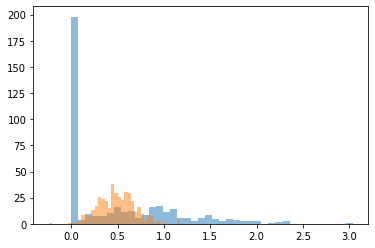

In [39]:
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40);
plt.hist(y_train,**kwargs);
plt.hist(y_predict_train_numcoord_glob, **kwargs);

<ins>**Showing the overlapping histograms of y_test in blue and y_predic_test in orange**</ins> 

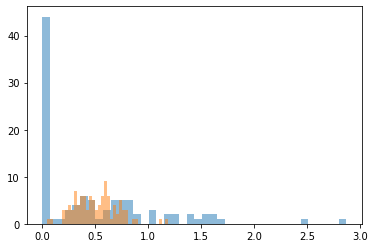

In [40]:
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40);
plt.hist(y_test, **kwargs);
plt.hist(y_predict_test_numcoord_filt, **kwargs);

The model is not able in the test dataset to predict area with log values greater than 1.2.

### Checking for heteroscedasticity

(0.9174577593803406, 3.686033615379718e-14)

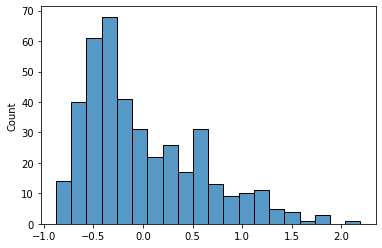

In [41]:
#plotting residuals
scipy.stats.shapiro(results_numcoord_filt.resid)
sns.histplot(results_numcoord_filt.resid, bins=20)

**Observation**: when the assumption of homoscedasticity is met, residuals are normally distributed around a mean of zero, which it is not clearly the case.

Text(0.5, 0, 'y_pred_train/predicted values')

Text(0, 0.5, 'Residuals')

(-2, 2.5)

(0, 1.5)

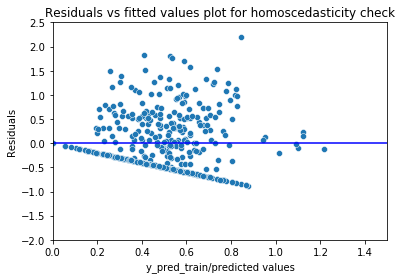

In [42]:
%%capture --no-display 
p = sns.scatterplot(y_predict_train_numcoord_filt,results_numcoord_filt.resid)
plt.xlabel('y_pred_train/predicted values')
plt.ylabel('Residuals')
plt.ylim(-2,2.5)
plt.xlim(0,1.5)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Observation**: There's no homogeneity of variance, and there are some outliers. The plot resembles the cone shape typical of heteroscedasticity. This breaks the OLS regression assumption that says that all residuals come from a population with constant variance.

### 2.1.3 Regression model where 'X' and 'Y' are treated as categorical variables, fitting all variables in our model

In [43]:
# Fit the LinearRegression predictor
model_catcoord_glob = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model_catcoord_glob = model_catcoord_glob.fit(X_train_catcoord_glob, y_train)          # 2- model fitting
y_predict_test_catcoord_glob = model_catcoord_glob.predict(X_test_catcoord_glob)       # 3- prediction
y_predict_train_catcoord_glob = model_catcoord_glob.predict(X_train_catcoord_glob)


print("Train R2 score ", r2_score(y_train, y_predict_train_catcoord_glob))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train_catcoord_glob))
print("Train RMSE score: ", np.sqrt(mean_squared_error(y_train, y_predict_train_catcoord_glob)))

print("Test R2 score ", r2_score(y_test, y_predict_test_catcoord_glob))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test_catcoord_glob))
print("Test RMSE score: ", np.sqrt(mean_squared_error(y_test, y_predict_test_catcoord_glob)))

cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=SEED)
mse=cross_val_score(model_catcoord_glob, X_test_catcoord_glob,y_test, scoring = 'neg_mean_squared_error',cv=cv) #5 cross validation
mean_mse=np.mean(mse)
print("mean MSE score ",mean_mse) #more close to 0 the better it is

Train R2 score  0.16940583643340057
Train MSE score  0.31491551127824335
Train RMSE score:  0.5611733344326362
Test R2 score  -0.10819195094121281
Test MSE score  0.36878996259379787
Test RMSE score:  0.6072807938621128
mean MSE score  -0.6483411210418765


In [44]:
#fit linear model
X_train_catcoord_glob_sm = sm.add_constant(X_train_catcoord_glob)
lm_model_catcoord_glob = sm.OLS(y_train, X_train_catcoord_glob_sm.astype(float))
results_catcoord_glob = lm_model_catcoord_glob.fit()
print(results_catcoord_glob.summary())

                            OLS Regression Results                            
Dep. Variable:             area_log10   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.925
Date:                Wed, 11 May 2022   Prob (F-statistic):            0.00111
Time:                        10:13:13   Log-Likelihood:                -343.21
No. Observations:                 408   AIC:                             766.4
Df Residuals:                     368   BIC:                             926.9
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1002      0.502      0.200      0.8

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<ins>**Showing the overlapping histograms of y_train in blue and y_predic_train in orange**</ins> 

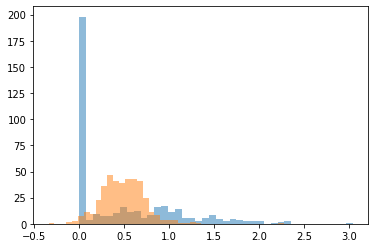

In [45]:
#Showing also the overlapping histograms of y_train in blue and y_predic_train in orange
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40);
plt.hist(y_train,**kwargs);
plt.hist(y_predict_train_catcoord_glob,**kwargs);

<ins>**Showing the overlapping histograms of y_test in blue and y_predic_test in orange**</ins> 

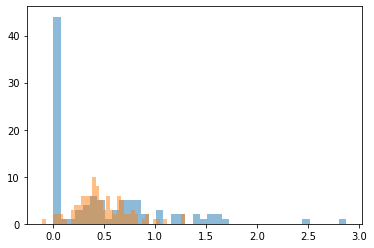

In [46]:
#Showing also the overlapping histograms of y_test in blue and y_predic_test in orange
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40);
plt.hist(y_test, **kwargs);
plt.hist(y_predict_test_catcoord_glob, **kwargs);

The model is not able in the test dataset to predict area with log values greater than 1.3.

### Checking for heteroscedasticity

(0.9411517977714539, 1.2341190569475913e-11)

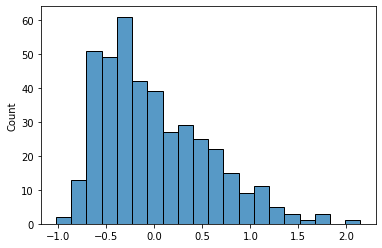

In [47]:
#plotting residuals
scipy.stats.shapiro(results_catcoord_glob.resid)
sns.histplot(results_catcoord_glob.resid, bins=20)

**Observation**: when the assumption of homoscedasticity is met, residuals are normally distributed around a mean of zero, which it is not clearly this case.

Text(0.5, 0, 'y_pred_train/predicted values')

Text(0, 0.5, 'Residuals')

(-2, 2.5)

(0, 2.5)

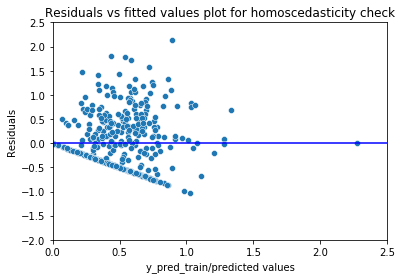

In [48]:
%%capture --no-display 
p = sns.scatterplot(y_predict_train_catcoord_glob,results_catcoord_glob.resid)
plt.xlabel('y_pred_train/predicted values')
plt.ylabel('Residuals')
plt.ylim(-2,2.5)
plt.xlim(0,2.5)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Observation**: There's no homogeneity of variance, and there are some outliers. The plot resembles the cone shape typical of heteroscedasticity. This breaks the OLS regression assumption that says that all residuals come from a population with constant variance.

### 2.1.4 Regression model where 'X' and 'Y' are treated as categorical variables, without fitting 'days' and 'rain'.

In [49]:
# Fit the LinearRegression predictor
model_catcoord_filt = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model_catcoord_filt = model_catcoord_filt.fit(X_train_catcoord_filt, y_train)          # 2- model fitting
y_predict_test_catcoord_filt = model_catcoord_filt.predict(X_test_catcoord_filt)       # 3- prediction
y_predict_train_catcoord_filt = model_catcoord_filt.predict(X_train_catcoord_filt)


print("Train R2 score ", r2_score(y_train, y_predict_train_catcoord_filt))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train_catcoord_filt))
print("Train RMSE score: ", np.sqrt(mean_squared_error(y_train, y_predict_train_catcoord_filt)))

print("Test R2 score ", r2_score(y_test, y_predict_test_catcoord_filt))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test_catcoord_filt))
print("Test RMSE score: ", np.sqrt(mean_squared_error(y_test, y_predict_test_catcoord_filt)))

cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=SEED)
mse=cross_val_score(model_catcoord_filt, X_test_catcoord_filt,y_test, scoring = 'neg_mean_squared_error',cv=cv) #5 cross validation
mean_mse=np.mean(mse)
print("mean MSE score ",mean_mse) #more close to 0 the better it is

Train R2 score  0.15109473303050647
Train MSE score  0.32185807208968686
Train RMSE score:  0.5673253670423056
Test R2 score  -0.032918697483545145
Test MSE score  0.3437401322793027
Test RMSE score:  0.58629355469705
mean MSE score  -0.5343944667491416


In [50]:
#fit linear model
X_train_catcoord_filt_sm = sm.add_constant(X_train_catcoord_filt)
lm_model_catcoord_filt = sm.OLS(y_train, X_train_catcoord_filt_sm.astype(float))
results_catcoord_filt = lm_model_catcoord_filt.fit()
print(results_catcoord_filt.summary())

                            OLS Regression Results                            
Dep. Variable:             area_log10   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.086
Date:                Wed, 11 May 2022   Prob (F-statistic):           0.000691
Time:                        10:13:21   Log-Likelihood:                -347.66
No. Observations:                 408   AIC:                             761.3
Df Residuals:                     375   BIC:                             893.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0347      0.483      0.072      0.9

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<ins>**Showing the overlapping histograms of y_train in blue and y_predic_train in orange**</ins> 

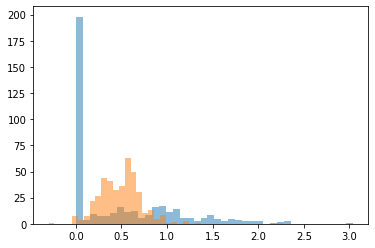

In [51]:
#Showing also the overlapping histograms of y_train in blue and y_predic_train in orange
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40);
plt.hist(y_train, **kwargs);
plt.hist(y_predict_train_catcoord_filt, **kwargs);

<ins>**Showing the overlapping histograms of y_test in blue and y_predic_test in orange**</ins> 

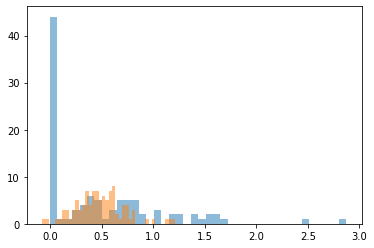

In [52]:
#Showing also the overlapping histograms of y_test in blue and y_predic_test in orange
kwargs = dict(histtype='stepfilled', alpha=0.5,  bins=40);
plt.hist(y_test,**kwargs);
plt.hist(y_predict_test_catcoord_filt, **kwargs);

### Checking for heteroscedasticity

(0.9307268857955933, 8.107597167412994e-13)

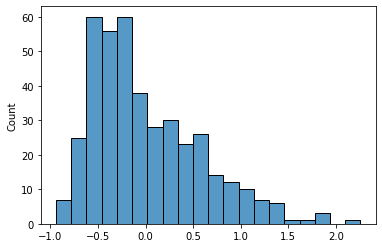

In [53]:
#plotting residuals
scipy.stats.shapiro(results_catcoord_filt.resid)
sns.histplot(results_catcoord_filt.resid, bins=20)

**Observation**: when the assumption of homoscedasticity is met, residuals are normally distributed around a mean of zero, which it is not clearly this case.

Text(0.5, 0, 'y_pred_train/predicted values')

Text(0, 0.5, 'Residuals')

(-2, 2.5)

(0, 2.5)

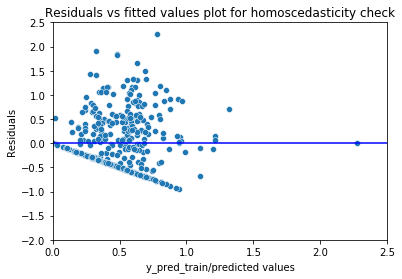

In [54]:
%%capture --no-display 
p = sns.scatterplot(y_predict_train_catcoord_filt,results_catcoord_filt.resid)
plt.xlabel('y_pred_train/predicted values')
plt.ylabel('Residuals')
plt.ylim(-2,2.5)
plt.xlim(0,2.5)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Observation**: There's no homogeneity of variance, and there are some outliers. The plot resembles the cone shape typical of heteroscedasticity. This breaks the OLS regression assumption that says that all residuals come from a population with constant variance.

<ins>**Conclusions**</ins> 

None of the models showed adequate predictive performance for the goal of predicting burned areas. 
Among the four model fitted, the predictive performance were slightly better for the model designed using the dataset with 'X' and 'Y' as categorical variables and by filtering out the independent variables 'day' and 'rain' (MSE: 0.3437401322793027).
So, for further investigations we considered the latest the best performing model.

None of our models respected several of the assumptions that makes multiple linear regression suitable for inference on the features that explain the burned area in the forest fires dataset. For example homoscedasticity was not verified, as well as the scatterplots between the dependent variable 'area' and the independent variables which did not show linear relationship between them. Furthermore, the residuals in no case were normally distributed around a mean of zero and several features were collinear. For all the above reasons we could not do feature selection using p-values.



## 2.2 Features combination analysis for best predictive performance model 

We further analyse the reduced models that could be created as a combination of all the variables.
Thus we used a function which retains for k number of features the best model based on prediction performance.

### 2.2.1 Filtered dataset with coordinates encoded as numerical values

**The dataset is further filtered using VIF values and underrepresented modalities in categories**

- DC is filtered due to high VIF
- month_may, month_nov, month_jan

*Days were filtered in previous steps*

In [55]:
y = df_area_log10['area_log10']
X_numcoord_filt_FCA=X_numcoord_filt.copy(deep=True) #jan may nov , y9 8 
X_numcoord_filt_FCA.shape
X_numcoord_filt_FCA=X_numcoord_filt_FCA.drop(['DC','month_may','month_nov', 'month_jan'], axis=1);
X_numcoord_filt_FCA.shape

(510, 20)

(510, 16)

In [56]:
y = df_area_log10['area_log10']
X_train_fs_num,X_test_fs_num,y_train_fs_num,y_test_fs_num = train_test_split(X_numcoord_filt_FCA, y, 
                                                                             test_size=0.2, random_state = SEED)


import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    # Compute all possibile combinations of 'dim' values
    subset_names = itertools.combinations(feature_names, dim)
    # Convert names into datasets
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names]
    return data_subsets

subsets = get_subsets(X_train_fs_num, 1)
subsets[0].head() # training set of the first subset
subsets[1].head() # training set of the second subset


,X
493,1
429,3
293,7
239,7
377,2


,Y
493,3
429,4
293,6
239,5
377,2


In [57]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator    

In [64]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer

def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                     subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                     test_evaluator=None, test_argbest=None, # Metric to be used on the test set
                     candidates_scorer_name=None,  # Name of 2. figure
                     subsets_scorer_name=None,     # Name of 3. figure
                     verbose=True, weight_step3=0,
                     num_features=None):  
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    if num_features is None:
        num_features = Xtrain_pd.shape[-1]

    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = [] 
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A counter to keep track of the total number of trials
    
    # 1. and 2. Evaluate all Mk candidates with
    #           k=0...P features
    # =========================================
    for dim in range(num_features+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        dim_subsets = get_subsets(Xtrain_pd, dim=dim)
        for Xtrain_sub in dim_subsets:
            
            # Train the model on the subset
            if Xtrain_sub.shape[-1] == 0:
                # 1. Train the M0 model if the number of
                #    features is zero!
                # ======================================
                model = DummyRegressor()
            else:
                model = LinearRegression(fit_intercept=True)
            
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([dim]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Save best candidate features
        best_features = dim_subsets[idx_best_candidate].columns.tolist()
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = dim_subsets[idx_best_candidate]
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_subset_Xtrain.columns.tolist()]
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how the 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
#    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
#    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
#                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()


### Attention: computationally expensive step.

............
Best model (M0) with 0 features: []
M0 subset score (3.): 0.33328838331875155
............
Best model (M1) with 1 features: ['month_sep']
M1 subset score (3.): 0.35723709066956805
............
Best model (M2) with 2 features: ['month_dec', 'month_sep']
M2 subset score (3.): 0.3476547590033907
............
Best model (M3) with 3 features: ['X', 'month_dec', 'month_sep']
M3 subset score (3.): 0.34739591888866866
............
Best model (M4) with 4 features: ['temp', 'wind', 'month_dec', 'month_sep']
M4 subset score (3.): 0.3472936449681446
............
Best model (M5) with 5 features: ['X', 'temp', 'wind', 'month_dec', 'month_sep']
M5 subset score (3.): 0.3459223526947744
............
Best model (M6) with 6 features: ['X', 'temp', 'wind', 'month_dec', 'month_feb', 'month_sep']
M6 subset score (3.): 0.35344748462165443
............
Best model (M7) with 7 features: ['X', 'DMC', 'temp', 'wind', 'month_dec', 'month_feb', 'month_sep']
M7 subset score (3.): 0.3511959163424355
....

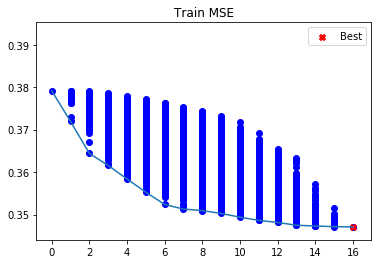

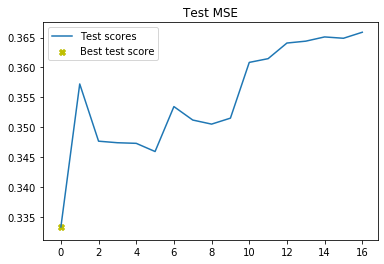

In [65]:
subset_selection(X_train_fs_num, y_train_fs_num, X_test_fs_num, y_test_fs_num,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="Train MSE",
                 subsets_scorer_name="Test MSE",
                 verbose=True)

**Observation:** Based on Test MSE score we could observe that the lowest score (0.3459) is achieved by the model with 5 features ['X', 'temp', 'wind', 'month_dec', 'month_sep']. However test MSE is not lower than the one obtained in the section 2.1.4 (Reduced, X Y categorical; MSE: 0.3437401322793027).

### 2.2.2 Filtered dataset with coordinates encoded as numerical values

Took out categorical variables which showed near to zero number of observations (due to sampling) to reduce the number of total combinations.

In [58]:
X_catcoord_filt_FCA=X_catcoord_filt.copy(deep=True) #jan may nov , y9 8 
X_catcoord_filt_FCA.head(3)
X_catcoord_filt_FCA=X_catcoord_filt_FCA.drop(['DC','month_may','month_nov', 'month_jan', 'Y_9', 'Y_8'], axis=1);
X_catcoord_filt_FCA.head(3)


,DMC,DC,ISI,temp,RH,wind,FFMC_cube,X_2,X_3,X_4,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,26.2,94.3,5.1,8.2,51,6.7,640503.928,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,35.4,669.1,6.7,18.0,33,0.9,743677.416,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,43.7,686.9,6.7,14.6,33,1.3,743677.416,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,DMC,ISI,temp,RH,wind,FFMC_cube,X_2,X_3,X_4,X_5,...,Y_5,Y_6,month_aug,month_dec,month_feb,month_jul,month_jun,month_mar,month_oct,month_sep
0,26.2,5.1,8.2,51,6.7,640503.928,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,35.4,6.7,18.0,33,0.9,743677.416,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,43.7,6.7,14.6,33,1.3,743677.416,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
y = df_area_log10['area_log10']
X_train_fs_cat,X_test_fs_cat,y_train_fs_cat,y_test_fs_cat = train_test_split(X_catcoord_filt_FCA, y,
                                                                             test_size=0.2, random_state = SEED)


### Attention: computationally expensive step: search reduced to 0 to 8 features combination but still required more than 1hr for being computed on I79750H CPU / 16 Gb 2666MHz RAM  hardware. N° features higher than 8 returned memory exhaustion error.  

,DMC
493,158.0
429,181.3
293,180.4
239,3.0
377,231.1


,ISI
493,11.3
429,7.6
293,11.0
239,3.5
377,8.4


............
Best model (M0) with 0 features: []
M0 subset score (3.): 0.33328838331875155
............
Best model (M1) with 1 features: ['X_3']
M1 subset score (3.): 0.33190573447448063
............
Best model (M2) with 2 features: ['X_3', 'month_sep']
M2 subset score (3.): 0.3538058336281832
............
Best model (M3) with 3 features: ['X_3', 'month_dec', 'month_sep']
M3 subset score (3.): 0.3447024585177024
............
Best model (M4) with 4 features: ['wind', 'X_3', 'month_dec', 'month_sep']
M4 subset score (3.): 0.3537291675442378
............
Best model (M5) with 5 features: ['temp', 'wind', 'X_3', 'month_dec', 'month_sep']
M5 subset score (3.): 0.34732934534253534
............
Best model (M6) with 6 features: ['temp', 'wind', 'X_3', 'month_dec', 'month_feb', 'month_sep']
M6 subset score (3.): 0.3541145884129094
............
Best model (M7) with 7 features: ['temp', 'wind', 'X_3', 'X_8', 'month_dec', 'month_feb', 'month_sep']
M7 subset score (3.): 0.35414033885266666
.........

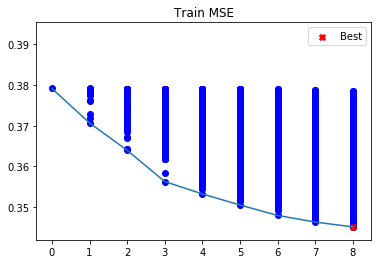

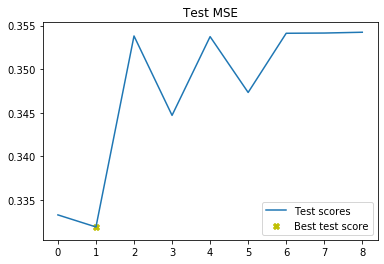

In [89]:
subsets = get_subsets(X_train_fs_cat, 1)
subsets[0].head() # training set of the first subset
subsets[1].head() # training set of the second subset

subset_selection(X_train_fs_cat, y_train_fs_cat, X_test_fs_cat, y_test_fs_cat,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="Train MSE",
                 subsets_scorer_name="Test MSE",
                 verbose=True,
                 num_features=8)
                 
                 

**Observation:** Based on Test MSE score we could observe that the lowest score (0.3447) is achieved by the model with 3 features ['X_3', 'month_dec', 'month_sep']. However test MSE is not lower than the one obtained in the section 2.1.4 (Reduced, X Y categorical; MSE: 0.3437401322793027).


**Conclusion:** we could not retrieve a more performing model by evauating more reduced models than the best one chosen in section 2.1.4

## 2.3 Ridge  and Lasso regression

The OLS estimator has the desired property of being unbiased. However, it can have a big variance when the predictor variables are highly correlated with each other. the general solution is to reduce variance at the cost of introducing some bias. This approach is called regularization.

Ridge regression is a kind of regularized linear regression that includes L2 penalty. It shrinks the coefficients for those input variables that do not contribute much to the prediction model.
It can be used in case data suffers from multicollinearity, like forestfires dataset and to reduce model complexity.

Lasso regression includes L1 penalty. Contrarirly to Ridge regression, this penalty allows some coefficient values to the value of zero, allowing input variables to be effectively removed from the model.

We performed RIdge and Lasso regression on the dataset which best performed in linear regression, it's the case of the dataset with 'X' and 'Y' treated as categorical variables, without fitting 'rain' and 'days'.

### 2.3.1 Ridge regression

In [55]:
%%capture --no-display 

##RIDGE REGRESSION##
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=SEED) #repeted k-fold cross validator
ridge=Ridge()
parameters = {'alpha':[1e-15, 1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor =GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=cv)
ridge_regressor.fit(X_catcoord_filt,y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=4, random_state=40),
             estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [56]:
print(ridge_regressor.best_params_) #returns the parameter setting that gave the best results
print("Mean MSE score",ridge_regressor.best_score_) #returns mean cross-validated score of the best_estimator

{'alpha': 5}
Mean MSE score -0.37025424608821744


In [57]:
# Set best alpha
ridge_best = Ridge(alpha=5)
ridge_best.fit(X_train_catcoord_filt, y_train)
#printed the features whose coefficients where set to 0 by Lasso regressor
print(list(zip(ridge_best.coef_, X_catcoord_filt)))

Ridge(alpha=5)

[(0.00130303778875929, 'DMC'), (-0.0005436483556264949, 'DC'), (-0.009785461082717873, 'ISI'), (0.007476891990086696, 'temp'), (-0.0008038793473583785, 'RH'), (0.04700482181100383, 'wind'), (5.029760001782457e-07, 'FFMC_cube'), (0.006795879209293802, 'X_2'), (-0.2595891744835311, 'X_3'), (0.01267691183766047, 'X_4'), (-0.15379565711255896, 'X_5'), (-0.01039971591728941, 'X_6'), (-0.0075591548479147135, 'X_7'), (0.13737784846739765, 'X_8'), (0.23281590573865074, 'X_9'), (0.08414639204696928, 'Y_3'), (0.12037271950122046, 'Y_4'), (0.08102133177297784, 'Y_5'), (0.06003131224714561, 'Y_6'), (0.2714069411939905, 'Y_8'), (-0.170337464153779, 'Y_9'), (-0.05612365789798563, 'month_aug'), (0.3390137011410711, 'month_dec'), (0.06698033622129189, 'month_feb'), (-0.0630532282857591, 'month_jan'), (-0.14468087452455505, 'month_jul'), (-0.15056519412228075, 'month_jun'), (-0.25350768363519904, 'month_mar'), (0.059147148442424795, 'month_may'), (-0.08405645126172755, 'month_nov'), (0.0011134646313527

As it should be in Ridge Regression, none of the variables coefficients were set to zero. The ones that were shrinked to zero the most were 'DC', 'RH', 'FFMC_cube'.

### 2.3.2 Lasso regression

In [58]:
%%capture --no-display 

##LASSO REGRESSION##
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=SEED) #repeted k-fold cross validator
parameters = {'alpha':[1e-15, 1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor =GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=cv)
lasso_regressor.fit(X_catcoord_filt,y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=4, random_state=40),
             estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [63]:
print(lasso_regressor.best_params_) #returns the parameter setting that gave the best results
print("Mean MSE score",lasso_regressor.best_score_) #returns mean cross-validated score of the best_estimator

{'alpha': 0.001}
Mean MSE score -0.3702747633092076


In [65]:
# Set best alpha
lasso_best = Lasso(alpha=0.001)
lasso_best.fit(X_train_catcoord_filt, y_train)
#printed the features whose coefficients where set to 0 by Lasso regressor
print(list(zip(lasso_best.coef_, X_catcoord_filt)))

Lasso(alpha=0.001)

[(0.00154307343476389, 'DMC'), (-0.0007887744517324827, 'DC'), (-0.008459472348878484, 'ISI'), (0.009329913700392522, 'temp'), (-0.0003193348693727638, 'RH'), (0.04269028710512702, 'wind'), (5.227537113200271e-07, 'FFMC_cube'), (0.006441664551014086, 'X_2'), (-0.27564872206268287, 'X_3'), (0.0, 'X_4'), (-0.17502386965476305, 'X_5'), (-0.0, 'X_6'), (-0.0, 'X_7'), (0.12086518006315167, 'X_8'), (0.4769740669526711, 'X_9'), (0.11018984568042617, 'Y_3'), (0.13870171223518699, 'Y_4'), (0.09876825015793328, 'Y_5'), (0.08088779581498043, 'Y_6'), (1.2479443828861174, 'Y_8'), (-0.5027729283902274, 'Y_9'), (0.0, 'month_aug'), (0.6119351352970543, 'month_dec'), (0.0511540994417561, 'month_feb'), (-0.02896967113904872, 'month_jan'), (-0.14459602800691607, 'month_jul'), (-0.2420001968337778, 'month_jun'), (-0.2941879486361937, 'month_mar'), (0.0, 'month_may'), (-0.1068628225848717, 'month_nov'), (0.0776594456697883, 'month_oct'), (0.3330346040445442, 'month_sep')]


It sets to 0 the coefficients of variables: 'X_4', 'X_6', 'X_7', 'month_aug', 'month_may'.

### 2.3.3 Ridge and Lasso metrics for model evaluation

In [61]:
prediction_ridge=ridge_regressor.predict(X_test_catcoord_filt)
prediction_lasso=lasso_regressor.predict(X_test_catcoord_filt)

In [67]:
print("Test R2 score ridge ", r2_score(y_test, prediction_ridge))
print("Test MSE score ridge ", mean_squared_error(y_test, prediction_ridge))
print("Test R2 score lasso ", r2_score(y_test, prediction_lasso))
print("Test MSE score lasso ", mean_squared_error(y_test, prediction_lasso))

Test R2 score ridge  0.039591063060762655
Test MSE score ridge  0.31960995171256174
Test R2 score lasso  0.061532564484787056
Test MSE score lasso  0.3123081431382031


With Ridge and Lasso regularization:

- the R2 scores for Test set finally becomes greater than 0.

- the MSE scores for Test set are the lowest achieved so far, with lasso (cat XY) being the most performing one


 ## 2.4 Random Forest Regression (RFR)

Since our attempt to perform predictions using linear models did not allow to obtain a suitable predictive model, we decided to test Random Forest Regression, which is a non-parametric method.

**Brief description of the model:**

RF is an ensemble learning approach based on decision trees that can be utilized for both classification and regression problems. RF models are based on decisional trees, which creation revolves on the recursive partitioning of data space. The output of the prediction models is the averaged answer that comes from all the trees that compone the ensemble. Trees in RF are characterized for being built on a subset of data using the boosting aggregating algorithm.

The advantage of this method is the fact of being able to capture non linear relationships and, more generally, relationships that are not suitable for linear modelling. In addition to this, the method is generally not heavily affected by data values transformations, as well as the necessity to perform an accurate feature selection before model fitting (altough feature selection is advised). So, in theory, this method could model relationships that not were not highlighted in our EDA.

On the other hand, the output model is complex and it is not suitable for a straightforward interpetation. In addition, like other non-parametric methods, RF models may be prone to overfitting, altough they may be to be less prone to it compared to other tree based models. 

The choices regarding RFR model creation range from single tree characteristics to the whole "forest" (e.g. number of trees to build) and they are controlled by hyparameters that need to be tuned to the training dataset. This step allows to increase model performance. 


**Analytical approach utilized:**

1. Hyperaparameter tuning on the global dataset
2. Model performance evaluation, Feature selection
3. Hyperaparameter tuning on the reduced dataset
4. Reduced model performance evaluation

Like in multiple linear regression, we evaluated:
- X,Y as numerical variables
- X,Y as categorical variables




<ins>**Loading libraries and functions, instantiating RFR and defining hyperparameter grid for their tuning**</ins>


To do hyperparameter tuning, we utilized a grid search approach using 5 different hyperparameters that are relevant for regression.

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=SEED)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
l_est=len(n_estimators)


# Number of features to consider at every split
max_features = ['auto', 'sqrt']
l_features=len(max_features)

# Maximum depth: longest path between the root node and the leaf node
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)

l_max_depth=len(max_depth)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]


# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 15, num = 2)]


# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


### 2.4.1 Coordinates are treated as numerical variables, global dataset:

In [38]:
X_train_numcoord_glob.columns
X_test_numcoord_glob.columns
y_train.head(3)
y_test.head(3)

Index(['X', 'Y', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'FFMC_cube',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

Index(['X', 'Y', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'FFMC_cube',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

493    1.646600
429    0.623249
293    1.941760
Name: area_log10, dtype: float64

404    0.847573
381    1.238799
362    0.181844
Name: area_log10, dtype: float64

<ins>**Global - X,Y as numerical: Hyperparameter tuning - Grid search**</ins> 

### *Attention: computationally expensive step. The next two cells can be escaped. Best hyperparameters are assigned in the third next cell.*

In [39]:
# compute n. combinations
best_hp_search_numcoord_global=GridSearchCV(estimator=rf,
                       param_grid=param_grid ,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1);

best_hp_search_numcoord_global.fit(X_train_numcoord_glob, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  6.5min finished
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Depre

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=40,...
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt

<ins>**Printing the best hyperparameters combination from the grid**</ins>


In [40]:
best_hp_numcoord_global = best_hp_search_numcoord_global.best_estimator_
best_hp_numcoord_global

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [41]:
rf_best_hp_numcoord_global=RandomForestRegressor(random_state=SEED, 
                                                bootstrap=True, criterion='mse', max_depth=3,
                                                max_features='sqrt', max_leaf_nodes=None,
                                                min_impurity_decrease=0.0, min_impurity_split=None,
                                                min_samples_leaf=1, min_samples_split=2,
                                                min_weight_fraction_leaf=0.0, n_estimators=300,
                                                n_jobs=None, oob_score=False,  verbose=0,
                                                warm_start=False)

rf_best_hp_numcoord_global.fit(X_train_numcoord_glob, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

<ins>**Printing model performance**</ins>


In [43]:
# Predict train set labels
y_pred_train_numcoord_global = rf_best_hp_numcoord_global.predict(X_train_numcoord_glob)
y_pred_test_numcoord_global = rf_best_hp_numcoord_global.predict(X_test_numcoord_glob)


# Compute MSE RMSE train
mse_pred_train_numcoord_global  = mean_squared_error(y_train, y_pred_train_numcoord_global)
rmse_pred_train_numcoord_global= mse_pred_train_numcoord_global**(1/2)

# Compute MSE RMSE test
mse_pred_test_numcoord_global  = mean_squared_error(y_test, y_pred_test_numcoord_global)
rmse_pred_test_numcoord_global= mse_pred_test_numcoord_global**(1/2)


# 10 fold CV MSE
MSE_CV_scores_odf_initial_best_model = - cross_val_score(rf_best_hp_numcoord_global, 
                                                         X_train_numcoord_glob, 
                                                         y_train, 
                                                         cv=10, 
                                                         scoring='neg_mean_squared_error',
                                                         n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores_odf_initial_best_model.mean())**(1/2)



print("Train MSE score ", mse_pred_train_numcoord_global)
print("Train RMSE score: ", rmse_pred_train_numcoord_global)
print("Train mean RMSE 10-fold CV score: ",RMSE_CV)
print(" ")
print("Test MSE score ", mse_pred_test_numcoord_global)
print("Test RMSE score: ", rmse_pred_test_numcoord_global)

Train MSE score  0.33395941292440795
Train RMSE score:  0.5778922156634471
Train mean RMSE 10-fold CV score:  0.6163879194127417
 
Test MSE score  0.3376001436254856
Test RMSE score:  0.5810336854481722


**Observation:** test MSE/RMSE are not drammaticaly lower than those obtained in multiple linear regression [best: test MSE 0.34374] but slightly higher than Lasso perfomance [test MSE: 0.31231]

<ins>**Feature selection based on features importances**</ins>


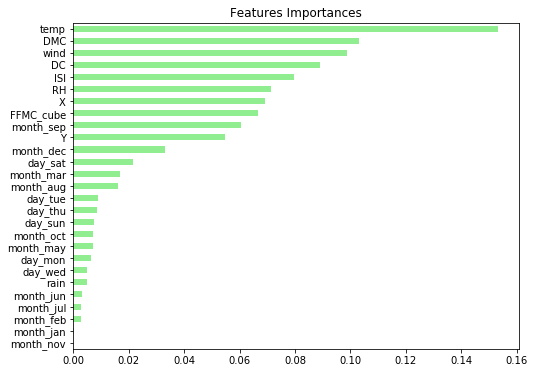

In [44]:
# Create a pd.Series of features importances
importances_numcoord_global = pd.Series(data=rf_best_hp_numcoord_global.feature_importances_,
                        index= X_train_numcoord_glob.columns)

# Sort importances
importances_numcoord_global = importances_numcoord_global.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(8, 6));
importances_numcoord_global.plot(kind='barh', color='lightgreen');
plt.title('Features Importances');
plt.show();

<ins>**Feature selection based on features importances > 0.02**</ins>

In [61]:
X_train_numcoord_reduced = X_train_numcoord_glob.copy(deep=True)
X_test_numcoord_reduced = X_test_numcoord_glob.copy(deep=True)

X_train_numcoord_reduced= X_train_numcoord_reduced.drop(['day_mon', 'day_tue', 'day_wed','day_thu' , 'day_sun' ,
                                    'month_nov', 'month_jun', 'month_jan', 'month_may', 'month_nov', 'month_feb', 'month_oct',
                                    'rain'],axis=1)
X_test_numcoord_reduced= X_test_numcoord_reduced.drop(['day_mon', 'day_tue', 'day_wed','day_thu' , 'day_sun' ,
                                    'month_nov', 'month_jun', 'month_jan', 'month_may', 'month_nov', 'month_feb', 'month_oct',
                                    'rain'],axis=1)


### 2.4.2 Reduced - X,Y as numerical: Hyperparameter tuning - Grid search

### *Attention: computationally expensive step. The next two cells can be escaped. Best hyperparameters are assigned in the third next cell.*

In [46]:
# compute n. combinations
best_hp_search_numcoord_reduced=GridSearchCV(estimator=rf,
                       param_grid=param_grid ,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1);

best_hp_search_numcoord_reduced.fit(X_train_numcoord_reduced, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 523 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 873 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 1323 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1873 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2523 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4123 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  6.3min finished
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Depre

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=40,...
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt

<ins>**Printing the best hyperparameters combination from the grid**</ins>


In [47]:
best_hp_numcoord_reduced = best_hp_search_numcoord_reduced.best_estimator_
best_hp_numcoord_reduced

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [62]:
rf_best_hp_numcoord_reduced=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False);

rf_best_hp_numcoord_reduced.fit(X_train_numcoord_reduced, y_train);

In [64]:
# Predict train set labels
y_pred_train_numcoord_reduced = rf_best_hp_numcoord_reduced.predict(X_train_numcoord_reduced)
y_pred_test_numcoord_reduced = rf_best_hp_numcoord_reduced.predict(X_test_numcoord_reduced)


# Compute MSE RMSE train
mse_pred_train_numcoord_reduced  = mean_squared_error(y_train, y_pred_train_numcoord_reduced)
rmse_pred_train_numcoord_reduced= mse_pred_train_numcoord_reduced**(1/2)

# Compute MSE RMSE test
mse_pred_test_numcoord_reduced  = mean_squared_error(y_test, y_pred_test_numcoord_reduced)
rmse_pred_test_numcoord_reduced= mse_pred_test_numcoord_reduced**(1/2)

MSE_CV_scores_numcoord_reduced  = - cross_val_score(rf_best_hp_numcoord_reduced, 
                                                         X_train_numcoord_reduced, 
                                                         y_train, 
                                                         cv=10, 
                                                         scoring='neg_mean_squared_error',
                                                         n_jobs=-1)


avg_MSE_CV_scores_numcoord_reduced = (MSE_CV_scores_numcoord_reduced.mean())**(1/2)

print("Train MSE score ", mse_pred_train_numcoord_reduced)
print("Train RMSE score: ", rmse_pred_train_numcoord_reduced)
print("Train mean RMSE 10-fold CV score: ",avg_MSE_CV_scores_numcoord_reduced)
print(" ")
print("Test MSE score ", mse_pred_test_numcoord_reduced)
print("Test RMSE score: ", rmse_pred_test_numcoord_reduced)

Train MSE score  0.33450938317500706
Train RMSE score:  0.5783678614644896
Train mean RMSE 10-fold CV score:  0.6155579970273468
 
Test MSE score  0.333390318526221
Test RMSE score:  0.5773996177052951


**Observation**: Feauture selection and HP re-tuning of the global dataset lead to a slightely better, reduced model. However, the gain in performance does not make it better than Lasso model performance.

### 2.4.3 Complete - X,Y as categorical: Hyperparameter tuning - Grid search

In [107]:
X_train_catcoord_glob.columns
X_test_catcoord_glob.columns
y_train.head(3)
y_test.head(3)

Index(['DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'FFMC_cube', 'X_2',
       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_3', 'Y_4', 'Y_5',
       'Y_6', 'Y_8', 'Y_9', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tue', 'day_wed'],
      dtype='object')

Index(['DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'FFMC_cube', 'X_2',
       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_3', 'Y_4', 'Y_5',
       'Y_6', 'Y_8', 'Y_9', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tue', 'day_wed'],
      dtype='object')

493    1.646600
429    0.623249
293    1.941760
Name: area_log10, dtype: float64

404    0.847573
381    1.238799
362    0.181844
Name: area_log10, dtype: float64

### *Attention: computationally expensive step. The next two cells can be escaped. Best hyperparameters are assigned in the third next cell.*

In [65]:
# compute n. combinations
best_hp_search_catcoord_global=GridSearchCV(estimator=rf,
                       param_grid=param_grid ,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1);

best_hp_search_catcoord_global.fit(X_train_catcoord_glob, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 263 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 513 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 863 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1313 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1863 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2513 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3263 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4113 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  7.8min finished
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Depre

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=40,...
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt

<ins>**Printing the best hyperparameters combination from the grid**</ins>


In [74]:
best_hp_numcoord_global = best_hp_search_catcoord_global.best_estimator_
best_hp_numcoord_global

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [75]:
rf_best_hp_catcoord_global=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

rf_best_hp_catcoord_global.fit(X_train_catcoord_glob, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [76]:
# Predict train set 
y_pred_train_catcoord_global = rf_best_hp_catcoord_global.predict(X_train_catcoord_glob)
y_pred_test_catcoord_global = rf_best_hp_catcoord_global.predict(X_test_catcoord_glob)


# Compute MSE RMSE train
mse_pred_train_catcoord_global  = mean_squared_error(y_train, y_pred_train_catcoord_global)
rmse_pred_train_catcoord_global= mse_pred_train_catcoord_global**(1/2)

# Compute MSE RMSE test
mse_pred_test_catcoord_global  = mean_squared_error(y_test, y_pred_test_catcoord_global)
rmse_pred_test_catcoord_global= mse_pred_test_catcoord_global**(1/2)


# 10 fold CV MSE
MSE_CV_scores_catcoord_global = - cross_val_score(rf_best_hp_catcoord_global, 
                                                         X_train_catcoord_glob, 
                                                         y_train, 
                                                         cv=10, 
                                                         scoring='neg_mean_squared_error',
                                                         n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV_catcord_global = (MSE_CV_scores_catcoord_global.mean())**(1/2)



print("Train MSE score ", mse_pred_train_catcoord_global)
print("Train RMSE score: ", rmse_pred_train_catcoord_global)
print("Train mean RMSE 10-fold CV score: ",RMSE_CV_catcord_global)
print(" ")
print("Test MSE score ", mse_pred_test_catcoord_global)
print("Test RMSE score: ", rmse_pred_test_catcoord_global)

Train MSE score  0.3028714281187894
Train RMSE score:  0.5503375583392337
Train mean RMSE 10-fold CV score:  0.6197430606923675
 
Test MSE score  0.35254136017705745
Test RMSE score:  0.5937519348827904


**Observations:** The test MSE is worst than the RFR model trained on data using XY coordinates as numerical variables.

<ins>**Feature selection based on features importances**</ins>


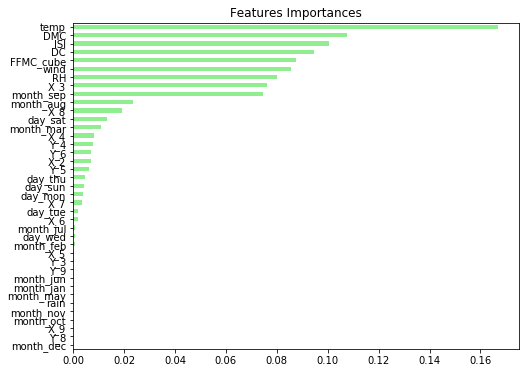

In [72]:
# Create a pd.Series of features importances
importances_catcord_global = pd.Series(data=rf_best_hp_catcoord_global.feature_importances_,
                        index= X_train_catcoord_glob.columns)

# Sort importances
importances_catcord_global = importances_catcord_global.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(8, 6));
importances_catcord_global.plot(kind='barh', color='lightgreen');
plt.title('Features Importances');
plt.show();

In [85]:
<ins>**Feature selection based on features importances > 0.02**</ins>

SyntaxError: invalid syntax (<ipython-input-85-798a44c1e92d>, line 1)

In [83]:
X_train_catcoord_reduced = X_train_catcoord_glob.copy(deep=True)
X_test_catcoord_reduced = X_test_catcoord_glob.copy(deep=True)

X_train_catcoord_reduced= X_train_catcoord_reduced.drop(['day_mon', 'day_tue', 'day_wed','day_thu' , 'day_sun' ,'day_sat' ,
                                    'month_nov', 'month_jun','month_jul', 'month_jan', 'month_may', 'month_nov', 'month_feb', 'month_oct',
                                     'month_mar', 'month_dec','Y_9', 'X_5', 'X_6', 'Y_5', 'Y_3', 'X_2', 'X_4', 'Y_6', 
                                    'X_8', 'X_9', 'X_7', 'Y_4',
                                    'rain'],axis=1)
X_test_catcoord_reduced= X_test_catcoord_reduced.drop(['day_mon', 'day_tue', 'day_wed','day_thu' , 'day_sun' ,'day_sat' ,
                                    'month_nov', 'month_jun','month_jul', 'month_jan', 'month_may', 'month_nov', 'month_feb', 'month_oct',
                                     'month_mar', 'month_dec','Y_9', 'X_5', 'X_6', 'Y_5', 'Y_3', 'X_2', 'X_4', 'Y_6', 
                                    'X_8', 'X_9', 'X_7', 'Y_4', 
                                    'rain'],axis=1)
X_train_catcoord_reduced.head(2)
X_test_catcoord_reduced.head(2)

,DMC,DC,ISI,temp,RH,wind,FFMC_cube,X_3,Y_8,month_aug,month_sep
493,158.0,633.6,11.3,27.5,29,4.5,881974.079,0,0,1,0
429,181.3,613.0,7.6,24.6,44,4.0,768575.296,1,0,1,0


,DMC,DC,ISI,temp,RH,wind,FFMC_cube,X_3,Y_8,month_aug,month_sep
404,84.8,725.1,3.7,21.8,34,2.2,679151.439,0,0,0,1
381,194.1,643.0,6.8,16.2,63,2.7,746142.643,0,0,1,0


### 2.4.4 Reduced - X,Y as categorical: Hyperparameter tuning - Grid search

In [84]:
# compute n. combinations
best_hp_search_catcoord_reduced=GridSearchCV(estimator=rf,
                       param_grid=param_grid ,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1);

best_hp_search_catcoord_reduced.fit(X_train_catcoord_reduced, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  6.8min finished
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Depre

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=40,...
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt

<ins>**Printing the best hyperparameters combination from the grid**</ins>


In [88]:
best_hp_catcoord_reduced = best_hp_search_catcoord_reduced.best_estimator_
best_hp_catcoord_reduced

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [89]:
best_hp_catcoord_reduced=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

best_hp_catcoord_reduced.fit(X_train_catcoord_reduced, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [90]:
# Predict train set labels
y_pred_train_catcoord_reduced = best_hp_catcoord_reduced.predict(X_train_catcoord_reduced)
y_pred_test_catcoord_reduced = best_hp_catcoord_reduced.predict(X_test_catcoord_reduced)


# Compute MSE RMSE train
mse_pred_train_catcoord_reduced  = mean_squared_error(y_train, y_pred_train_catcoord_reduced)
rmse_pred_train_catcoord_reduced= mse_pred_train_catcoord_reduced**(1/2)

# Compute MSE RMSE test
mse_pred_test_catcoord_reduced  = mean_squared_error(y_test, y_pred_test_catcoord_reduced)
rmse_pred_test_catcoord_reduced= mse_pred_test_catcoord_reduced**(1/2)

MSE_CV_scores_catcoord_reduced  = - cross_val_score(best_hp_catcoord_reduced, 
                                                         X_train_catcoord_reduced, 
                                                         y_train, 
                                                         cv=10, 
                                                         scoring='neg_mean_squared_error',
                                                         n_jobs=-1)


avg_MSE_CV_scores_catcoord_reduced = (MSE_CV_scores_catcoord_reduced.mean())**(1/2)

print("Train MSE score ", mse_pred_train_catcoord_reduced)
print("Train RMSE score: ", rmse_pred_train_catcoord_reduced)
print("Train mean RMSE 10-fold CV score: ",avg_MSE_CV_scores_catcoord_reduced)
print(" ")
print("Test MSE score ", mse_pred_test_catcoord_reduced)
print("Test RMSE score: ", rmse_pred_test_catcoord_reduced)

Train MSE score  0.3365922346328249
Train RMSE score:  0.5801656958428556
Train mean RMSE 10-fold CV score:  0.6156757770382328
 
Test MSE score  0.34761112962871277
Test RMSE score:  0.5895855575136765


**Observation:** The reduced model has a worse perfomance than the complete model (coord. XY categorical)

**Conclusion**: despite the capacity to model more complex relationships, RFR did not retrieved models dramatically better than multiple linear regression one. In conclusion, our best model has been retrieved utilizing Lasso regression for categorical XY coordinates, prefiltered for features "rain" and "day", yielding test MSE 0.31231.